In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll
%matplotlib inline

In [2]:
data_base_path = os.path.join("..", "data", "TrainingData")
subject_x_template = "subject_{}_{}__x.csv"
subject_x_time_template = "subject_{}_{}__x_time.csv"
subject_y_template = "subject_{}_{}__y.csv"
subject_y_time_template = "subject_{}_{}__y_time.csv"

In [3]:
def label_list(subject_id, session_id):
    y_path = os.path.join(data_base_path, subject_y_template.format(subject_id, session_id))
    y = pd.read_csv(y_path, names=["label"])
    return np.array(y.values)

In [4]:
subject_ids = ['001', '002', '003', '004', '005', '006', '007', '008']
session_ids = ['01','02','03','04','05','06','07','08']

In [5]:
y_full = []
for subject_id in subject_ids:
    
    for session_id in session_ids:
        
        try:
            y = label_list(subject_id,session_id)
            #print("y shape:",y.shape)
            #print("y_full shape:", y_full.shape)
            y_full = np.append(y_full, y)
        except FileNotFoundError as e:
            print(e)
            break

[Errno 2] No such file or directory: '..\\data\\TrainingData\\subject_002_06__y.csv'
[Errno 2] No such file or directory: '..\\data\\TrainingData\\subject_003_04__y.csv'
[Errno 2] No such file or directory: '..\\data\\TrainingData\\subject_004_03__y.csv'
[Errno 2] No such file or directory: '..\\data\\TrainingData\\subject_005_04__y.csv'
[Errno 2] No such file or directory: '..\\data\\TrainingData\\subject_006_04__y.csv'
[Errno 2] No such file or directory: '..\\data\\TrainingData\\subject_007_05__y.csv'
[Errno 2] No such file or directory: '..\\data\\TrainingData\\subject_008_02__y.csv'


In [6]:
y_full.astype('uint8')

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [7]:
len(y_full)

335413

In [8]:
_, count = np.unique(y_full, return_counts = True)

In [9]:
count 

array([251733,  13804,  18267,  51609], dtype=int64)

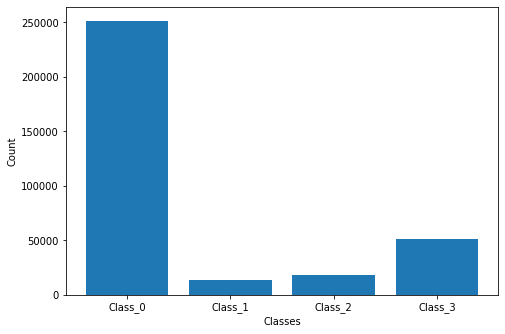

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['Class_0', 'Class_1', 'Class_2', 'Class_3']
ax.set_ylabel('Count')
ax.set_xlabel('Classes')
ax.bar(classes,count)
plt.show()